In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
 
%matplotlib inline

In [2]:
df = pd.read_excel("Project_Data_set.xlsx", index_col = None)

In [3]:
df.head()

,Unnamed: 0,CASEID,HEALTH2,AGE2,EDUCCAT2,EMPSTAT4,POVERTY2,K6SCMON,K6SCYR,K6SCMAX,...,ALCDAYS,NODR30A,DR5DAY,MJYRTOT,MRDAYPYR,MRDAYPMO,MRDAYPWK,MJDAY30A,DEPNDALC,DEPNDMRJ
0,0,1,2.0,17,3,4,2.0,0,10.291153,0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0,0
1,1,2,2.0,8,3,2,1.0,12,21.000000,21,...,1.0,5.0,1.0,104.0,3.153398,0.383745,2.0,1.0,0,0
2,2,3,3.0,13,2,1,1.0,12,10.291153,12,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0,0
3,3,4,3.0,16,2,1,2.0,15,24.000000,24,...,1.0,2.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0,0
4,4,5,2.0,16,4,1,3.0,0,10.291153,0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0,0


In [62]:
df= df[['CASEID', 'HEALTH2', 'AGE2', 'EDUCCAT2', 'EMPSTAT4',
       'POVERTY2', 'K6SCMON', 'K6SCYR', 'K6SCMAX', 'ALCYRTOT', 'ALDAYPYR',
       'ALDAYPMO', 'ALDAYPWK', 'ALCDAYS', 'NODR30A', 'DR5DAY', 'MJYRTOT',
       'MRDAYPYR', 'MRDAYPMO', 'MRDAYPWK', 'MJDAY30A', 'DEPNDALC', 'DEPNDMRJ']]

In [ ]:
df.corr()

In [5]:
col_names = list(df)
print (col_names)

['CASEID', 'HEALTH2', 'AGE2', 'EDUCCAT2', 'EMPSTAT4', 'POVERTY2', 'K6SCMON', 'K6SCYR', 'K6SCMAX', 'ALCYRTOT', 'ALDAYPYR', 'ALDAYPMO', 'ALDAYPWK', 'ALCDAYS', 'NODR30A', 'DR5DAY', 'MJYRTOT', 'MRDAYPYR', 'MRDAYPMO', 'MRDAYPWK', 'MJDAY30A', 'DEPNDALC', 'DEPNDMRJ']


In [6]:
#create df for alcohol, weed and K6 variables

In [7]:
df_alc= df[['ALCYRTOT', 'ALDAYPYR', 'ALDAYPMO', 'ALDAYPWK', 'ALCDAYS', 'NODR30A', 'DR5DAY']]
df_mr= df[['MJYRTOT', 'MRDAYPYR', 'MRDAYPMO', 'MRDAYPWK', 'MJDAY30A']]
df_K6 = df[['K6SCMON', 'K6SCYR', 'K6SCMAX']]   

In [8]:
#PCA visualisation

PCA is effected by scale so we need to scale the features in our data before applying PCA. Use StandardScaler to help  standardize the dataset’s features onto unit scale (mean = 0 and variance = 1) which is a requirement for the optimal performance of many machine learning algorithms.

In [9]:
#standardization

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaled_data_alc= StandardScaler().fit_transform(df_alc)
scaled_data_mr= StandardScaler().fit_transform(df_mr)
scaled_data_K6= StandardScaler().fit_transform(df_K6)

scaled_data_alc= df_alc.apply(np.log)
scaled_data_mr= df_mr.apply(np.log)
scaled_data_K6= df_K6.apply(np.log)

scaled_data_alc.head()

In [12]:
df_alc.shape


(40428, 7)

In [13]:
df_mr.shape

(40428, 5)

In [14]:
df_K6.shape

(40428, 3)

In [15]:
#PCA with Scikit Learn uses a very similar process to other preprocessing functions that come with SciKit Learn. 
#We instantiate a PCA object, find the principal components using the fit method, then apply the rotation and dimensionality reduction by calling transform().
#We can also specify how many components we want to keep when creating the PCA object.

In [16]:
from sklearn.decomposition import PCA

In [17]:
pca = PCA(n_components=1) #set how many dimensions

In [18]:
x_pca_alc =pca.fit_transform(scaled_data_alc)
x_pca_mr =pca.fit_transform(scaled_data_mr)
x_pca_K6 =pca.fit_transform(scaled_data_K6)

In [19]:
#Now we can transform this data to its first principal component.

In [20]:
scaled_data_alc.shape #shape before

(40428, 7)

In [21]:
x_pca_alc.shape  #shape after (to check if worked)

(40428, 1)

We've reduced the 7,5 and 3 dimensions to just 1.


In [22]:
#Unfortunately, with this great power of dimensionality reduction, comes the cost of being able to easily understand what these components represent.
#The components correspond to combinations of the original features, the components themselves are stored as an attribute of the fitted PCA object:

In [23]:
df_comp_alc =pd.DataFrame(data=x_pca_alc, columns= ['PCA_alcohol1'])
df_comp_mr =pd.DataFrame(data=x_pca_alc, columns= ['PCA_marijuana'])
df_comp_K6 =pd.DataFrame(data=x_pca_alc, columns= ['PCA K6'])

In [64]:
#now do regression on PCA data instead of whole df

In [70]:
pca.explained_variance_ #eigenvalues

array([2.27260908])

In [68]:
pca.components_ #Loading Scores

array([[0.59929521, 0.49144534, 0.63192304]])

##Regression on PCA 

In [25]:
df.columns

Index(['CASEID', 'HEALTH2', 'AGE2', 'EDUCCAT2', 'EMPSTAT4', 'POVERTY2',
       'K6SCMON', 'K6SCYR', 'K6SCMAX', 'ALCYRTOT', 'ALDAYPYR', 'ALDAYPMO',
       'ALDAYPWK', 'ALCDAYS', 'NODR30A', 'DR5DAY', 'MJYRTOT', 'MRDAYPYR',
       'MRDAYPMO', 'MRDAYPWK', 'MJDAY30A', 'DEPNDALC', 'DEPNDMRJ'],
      dtype='object')

In [26]:
df_PCA =df[['CASEID', 'HEALTH2', 'AGE2', 'EDUCCAT2', 'EMPSTAT4', 'POVERTY2', 'K6SCMON', 'K6SCYR', 'K6SCMAX']]

In [27]:
df_PCA=df_PCA.assign(x_pca_alc = x_pca_alc, x_pca_mr=x_pca_mr, x_pca_K6=x_pca_K6)


In [28]:
df_PCA.describe()

,CASEID,HEALTH2,AGE2,EDUCCAT2,EMPSTAT4,POVERTY2,K6SCMON,K6SCYR,K6SCMAX,x_pca_alc,x_pca_mr,x_pca_K6
count,40428.000000,40428.000000,40428.000000,40428.000000,40428.000000,40428.000000,40428.000000,40428.000000,40428.00000,4.042800e+04,4.042800e+04,4.042800e+04
mean,27670.818838,2.256801,13.468438,2.716929,2.018527,2.407678,4.194098,10.238884,5.44583,3.198647e-16,-2.044413e-15,1.658140e-16
std,15955.314275,0.942676,2.693680,1.015069,1.252885,0.785517,4.439884,3.485937,5.74056,1.854994e+00,1.686070e+00,1.507518e+00
min,1.000000,1.000000,7.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.00000,-1.743748e+00,-5.228009e-01,-2.609102e+00
25%,13832.750000,2.000000,12.000000,2.000000,1.000000,2.000000,1.000000,10.291153,1.00000,-1.743748e+00,-5.228009e-01,-1.158244e+00
50%,27701.500000,2.000000,14.000000,3.000000,1.000000,3.000000,3.000000,10.291153,4.00000,-5.134446e-01,-5.228009e-01,-4.230535e-01
75%,41527.500000,3.000000,15.000000,4.000000,3.000000,3.000000,6.000000,10.291153,8.00000,7.362510e-01,-5.228009e-01,5.572000e-01
max,55270.000000,4.000000,17.000000,4.000000,4.000000,3.000000,24.000000,24.000000,24.00000,1.521942e+01,9.185577e+00,6.655966e+00


C:\Users\sharl\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


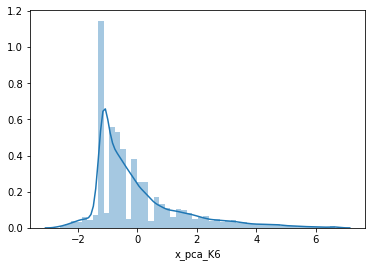

In [29]:
sns.distplot(df_PCA['x_pca_K6'])

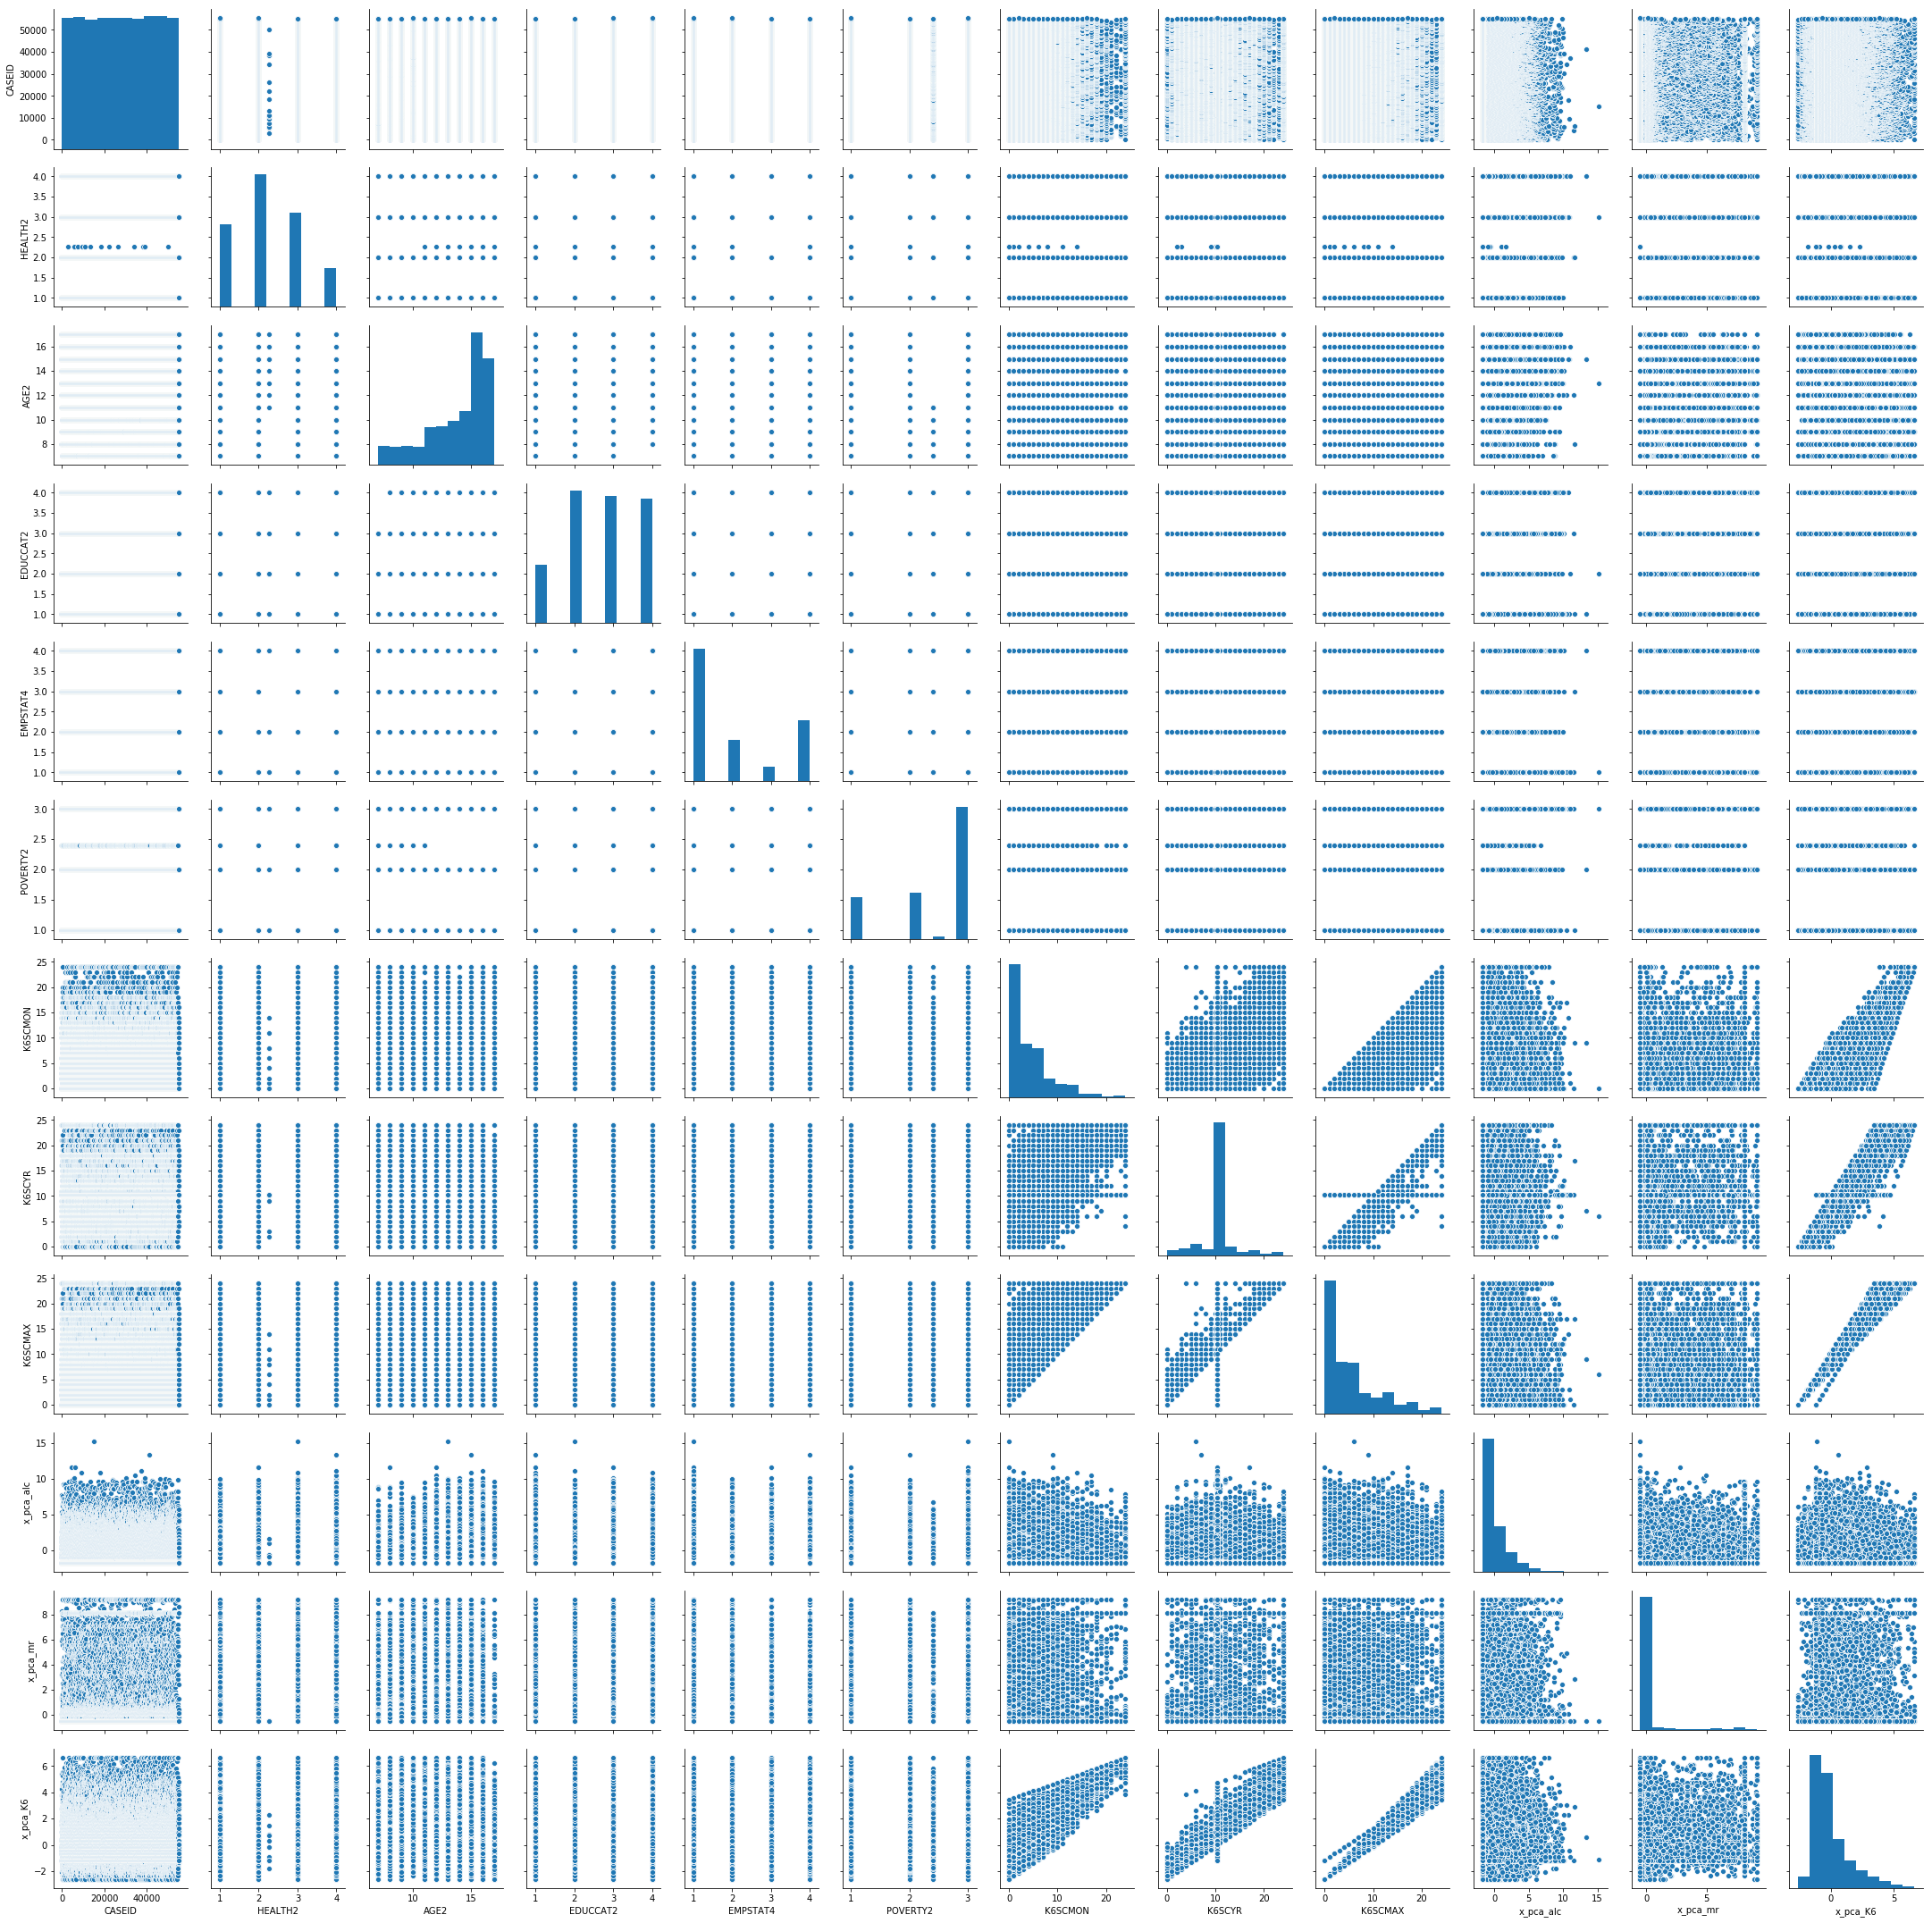

In [30]:
sns.pairplot(df_PCA) #creates histogram and correlation  scater plots

In [31]:
df_PCA.corr()

,CASEID,HEALTH2,AGE2,EDUCCAT2,EMPSTAT4,POVERTY2,K6SCMON,K6SCYR,K6SCMAX,x_pca_alc,x_pca_mr,x_pca_K6
CASEID,1.000000,0.002448,-0.001601,-0.006789,0.002640,-0.011334,-0.000236,0.002484,0.002782,0.000092,-0.002472,0.001882
HEALTH2,0.002448,1.000000,0.166768,-0.243992,0.189645,-0.159823,0.212051,0.102415,0.178376,-0.068848,0.046934,0.192459
AGE2,-0.001601,0.166768,1.000000,0.169894,-0.003884,0.215726,-0.187999,-0.127492,-0.196031,0.038821,-0.166091,-0.198473
EDUCCAT2,-0.006789,-0.243992,0.169894,1.000000,-0.208874,0.356889,-0.078475,-0.078144,-0.035891,0.143881,-0.074686,-0.071717
EMPSTAT4,0.002640,0.189645,-0.003884,-0.208874,1.000000,-0.268179,0.101292,0.055861,0.075278,-0.148803,-0.011405,0.090034
POVERTY2,-0.011334,-0.159823,0.215726,0.356889,-0.268179,1.000000,-0.157394,-0.099060,-0.129143,0.124908,-0.072501,-0.148999
K6SCMON,-0.000236,0.212051,-0.187999,-0.078475,0.101292,-0.157394,1.000000,0.434985,0.868561,0.017277,0.117913,0.903437
K6SCYR,0.002484,0.102415,-0.127492,-0.078144,0.055861,-0.099060,0.434985,1.000000,0.577137,0.002159,0.073043,0.740853
K6SCMAX,0.002782,0.178376,-0.196031,-0.035891,0.075278,-0.129143,0.868561,0.577137,1.000000,0.020223,0.111589,0.952623
x_pca_alc,0.000092,-0.068848,0.038821,0.143881,-0.148803,0.124908,0.017277,0.002159,0.020223,1.000000,0.197137,0.016049


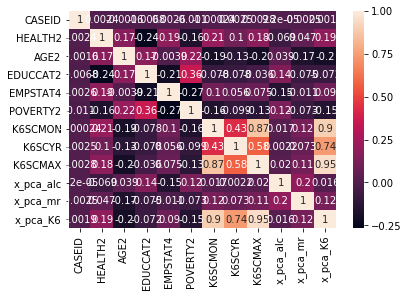

In [32]:
sns.heatmap(df_PCA.corr(), annot=True)

In [33]:
df_PCA.columns

Index(['CASEID', 'HEALTH2', 'AGE2', 'EDUCCAT2', 'EMPSTAT4', 'POVERTY2',
       'K6SCMON', 'K6SCYR', 'K6SCMAX', 'x_pca_alc', 'x_pca_mr', 'x_pca_K6'],
      dtype='object')

Training a linear reg model with scikit. 
Split the data into features to train on (x array) and target variable(y).

In [34]:
X = df_PCA[['HEALTH2', 'AGE2', 'EDUCCAT2', 'EMPSTAT4', 'POVERTY2', 'x_pca_alc', 'x_pca_mr']] #education and employment is non linear, maybe better logistic regression

In [35]:
y = df_PCA['K6SCMON']

In [36]:
from sklearn.model_selection  import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101) #40% test, #random split seed 101

create and train the model

In [38]:
from sklearn.linear_model import LinearRegression #import a reg model

In [39]:
lm = LinearRegression()  #initiate and instance of regression model

In [40]:
lm.fit(X_train, y_train) #train/fit my model on training data

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [41]:
#evaluate the model, check it's coefficient and see how can be interpreted

In [42]:
print(lm.intercept_)  #print the intercept

6.396828334158453


In [43]:
lm.coef_ #grab the coefficience for each feautre

array([ 1.10924153, -0.34112737,  0.20439568,  0.20357001, -0.44325773,
        0.08769006,  0.17212308])

In [44]:
X_train.columns

Index(['HEALTH2', 'AGE2', 'EDUCCAT2', 'EMPSTAT4', 'POVERTY2', 'x_pca_alc',
       'x_pca_mr'],
      dtype='object')

In [45]:
cdf = pd.DataFrame(lm.coef_,X_train.columns, columns=['coefficient'])

In [46]:
cdf #cdf as coefficient dataFrame

,coefficient
HEALTH2,1.109242
AGE2,-0.341127
EDUCCAT2,0.204396
EMPSTAT4,0.203570
POVERTY2,-0.443258
x_pca_alc,0.087690
x_pca_mr,0.172123


#predictions

In [47]:
predictions = lm.predict(X_test)

In [48]:
predictions

array([5.74178157, 4.32570909, 4.01327443, ..., 4.32570909, 2.79322656,
       3.88427265])

#test how far off is our prediction from the actual Y (target variable)

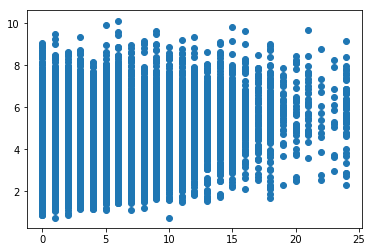

In [49]:
plt.scatter(y_test, predictions)

C:\Users\sharl\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


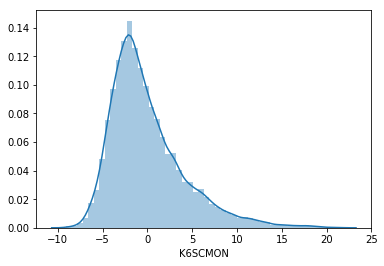

In [50]:
sns.distplot(y_test-predictions) #residual histogram

#normal distribution implies linear regression is good choice of model 

#regression evaluation metrics

In [51]:
from sklearn import metrics

In [52]:
metrics.mean_absolute_error(y_test, predictions) #MAE

3.163314341677483

In [53]:
metrics.mean_squared_error(y_test, predictions) #MSE ---this one 'punishes' large erorrs

17.390223513854995

In [54]:
np.sqrt(metrics.mean_squared_error(y_test, predictions)) #RMSE --- interpreted in 'y' units

4.170158691687283

##Logistic regression???

In [55]:
from sklearn.linear_model import LogisticRegression

In [56]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [57]:
predictions_linear = logmodel.predict(X_test)

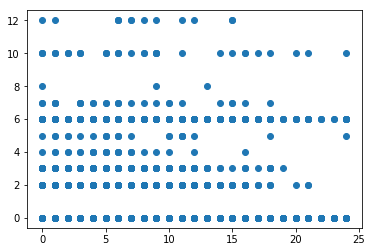

In [58]:
plt.scatter(y_test, predictions_linear)

In [59]:
##evaluations

In [60]:
from sklearn.metrics import classification_report

In [61]:
print(classification_report(y_test,predictions))

ValueError: Mix type of y not allowed, got types {'multiclass', 'continuous'}